In [ ]:
import pandas as pd
import seaborn as sn
import numpy as np


In [ ]:
df=pd.read_csv('/content/googleplaystore.csv')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
df['Reviews'].unique().tolist()

In [ ]:
def rev(r):
  try:
    return float(r)
  except:
    return np.nan
df['Reviews']=df['Reviews'].apply(rev)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10840 non-null  float64
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(2), object(11)
memory usage: 1.1+ MB


In [ ]:
df['Last Updated']=pd.to_datetime(df['Last Updated'],format='%B %d, %Y',errors='coerce')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20,1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device


In [ ]:
from datetime import datetime

In [ ]:
df['lastupdatenumber']=(datetime.now()-df['Last Updated'])/np.timedelta64(1,'M')
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,lastupdatenumber
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159.0,19M,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,49.082997
1,Coloring book moana,ART_AND_DESIGN,3.9,967.0,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,48.820158
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510.0,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,42.314891
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644.0,25M,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,44.089054
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967.0,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,43.694796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38.0,53M,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up,54.536908
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4.0,3.6M,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up,43.169118
10838,Parkinson Exercices FR,MEDICAL,NaN,3.0,9.5M,"1,000+",Free,0,Everyone,Medical,2017-01-20,1.0,2.2 and up,60.647916
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114.0,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,84.697691


In [ ]:
df['Rating'].describe()

count    9367.000000
mean        4.193338
std         0.537431
min         1.000000
25%         4.000000
50%         4.300000
75%         4.500000
max        19.000000
Name: Rating, dtype: float64

In [ ]:
df[df['Rating']>6]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,lastupdatenumber
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,NaN,"1,000+",Free,0,Everyone,NaN,"February 11, 2018",NaT,4.0 and up,NaN,NaN


In [ ]:
df.drop(10472,axis=0,inplace=True)    #outlier


In [ ]:
from sklearn import impute
from sklearn.impute import SimpleImputer
imputer =SimpleImputer(strategy='mean') #numrical values
df['Rating']=imputer.fit_transform(df[['Rating']])
imputer.statistics_
df.isna().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Type                1
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         8
Android Ver         2
lastupdatenumber    0
dtype: int64

In [ ]:
df['Size'].unique().tolist()

In [ ]:
# found that size cat and it supposed to be num before we fill it with imputer !!
def fix_size (s):
  if s.endswith('K'):
    return float(s[:-1])/1024

  elif s.endswith('M'):
    return float(s[:-1])
  
  elif s== 'Varies with device':
    return np.nan 

  elif s== '1.000+':
    return np.nan

df['Size']=df['Size'].apply(fix_size)
df

In [ ]:
imputer =SimpleImputer(strategy='mean') #numerical values
df['Size']=imputer.fit_transform(df[['Size']])
df.isna().sum()

In [ ]:
def fix_rev (r):
  try:
    return float(r)
  except:
    return np.nan

df['Reviews']=df['Reviews'].apply(fix_rev)

In [ ]:
df.info()

In [ ]:
imputer =SimpleImputer(strategy='mean') #numerical values
df['Reviews']=imputer.fit_transform(df[['Reviews']])
df.isna().sum()

App                    0
Category               0
Rating                 0
Reviews                0
Size                2011
Installs               0
Type                   1
Price                  0
Content Rating         0
Genres                 0
Last Updated           0
Current Ver            8
Android Ver            2
lastupdatenumber       0
dtype: int64

In [ ]:
imputer =SimpleImputer(strategy='most_frequent')#catigorical
df['Type']=imputer.fit_transform(df[['Type']])
df.isna().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         8
Android Ver         2
lastupdatenumber    0
dtype: int64

In [ ]:
imputer =SimpleImputer(strategy='most_frequent')
df['Current Ver']=imputer.fit_transform(df[['Current Ver']])
df.isna().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         0
Android Ver         2
lastupdatenumber    0
dtype: int64

In [ ]:
imputer =SimpleImputer(strategy='most_frequent')
df['Android Ver']=imputer.fit_transform(df[['Android Ver']])
df.isna().sum()

App                 0
Category            0
Rating              0
Reviews             0
Size                0
Installs            0
Type                0
Price               0
Content Rating      0
Genres              0
Last Updated        0
Current Ver         0
Android Ver         0
lastupdatenumber    0
dtype: int64

In [ ]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,lastupdatenumber
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19.00000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,49.082997
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14.00000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,48.820158
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8.70000,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,42.314891
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644.0,25.00000,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,44.089054
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2.80000,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,43.694796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53.00000,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up,54.536908
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.60000,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up,43.169118
10838,Parkinson Exercices FR,MEDICAL,4.191757,3.0,9.50000,"1,000+",Free,0,Everyone,Medical,2017-01-20,1.0,2.2 and up,60.647916
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114.0,22.27054,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,84.697691


In [ ]:
df.drop_duplicates(inplace=True)
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,lastupdatenumber
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.100000,159.0,19.00000,"10,000+",Free,0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,49.082997
1,Coloring book moana,ART_AND_DESIGN,3.900000,967.0,14.00000,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,48.820158
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.700000,87510.0,8.70000,"5,000,000+",Free,0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,42.314891
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.500000,215644.0,25.00000,"50,000,000+",Free,0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,44.089054
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.300000,967.0,2.80000,"100,000+",Free,0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,43.694796
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.500000,38.0,53.00000,"5,000+",Free,0,Everyone,Education,2017-07-25,1.48,4.1 and up,54.536908
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.000000,4.0,3.60000,100+,Free,0,Everyone,Education,2018-07-06,1.0,4.1 and up,43.169118
10838,Parkinson Exercices FR,MEDICAL,4.191757,3.0,9.50000,"1,000+",Free,0,Everyone,Medical,2017-01-20,1.0,2.2 and up,60.647916
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.500000,114.0,22.27054,"1,000+",Free,0,Mature 17+,Books & Reference,2015-01-19,Varies with device,Varies with device,84.697691


In [ ]:
import seaborn as sns

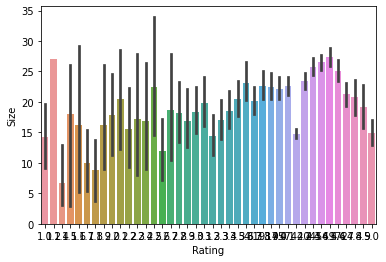

In [ ]:
sns.barplot(y='Size',x='Rating',data=df)

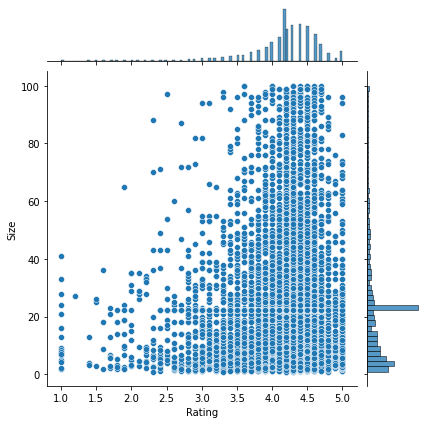

In [ ]:
sns.jointplot(y='Size',x='Rating',data=df)

In [ ]:
df.groupby(df['Installs']).describe()['Size']

,count,mean,std,min,25%,50%,75%,max
Installs,,,,,,,,
0,1.0,22.270540,NaN,22.27054,22.27054,22.27054,22.27054,22.27054
0+,14.0,13.028571,17.092663,1.20000,2.75000,5.70000,9.67500,56.00000
1+,67.0,15.886474,14.317125,1.60000,5.05000,14.00000,22.27054,75.00000
"1,000+",890.0,15.822758,16.305726,1.00000,4.20000,10.00000,22.27054,98.00000
"1,000,000+",1488.0,26.033494,21.878466,1.20000,9.70000,22.27054,33.00000,100.00000
"1,000,000,000+",49.0,27.185554,16.775722,13.00000,22.27054,22.27054,22.27054,76.00000
10+,385.0,14.910555,15.438991,1.00000,3.90000,10.00000,22.27054,98.00000
"10,000+",1033.0,17.135289,16.995851,1.10000,4.30000,12.00000,22.27054,100.00000
"10,000,000+",1132.0,29.800498,22.502381,1.20000,19.00000,22.27054,34.25000,100.00000


In [ ]:
df[df['Installs']=='1,000,000+']

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,lastupdatenumber
7,Infinite Painter,ART_AND_DESIGN,4.1,36815.0,29.0,"1,000,000+",Free,0,Everyone,Art & Design,2018-06-14,6.1.61.1,4.2 and up,43.891925
8,Garden Coloring Book,ART_AND_DESIGN,4.4,13791.0,33.0,"1,000,000+",Free,0,Everyone,Art & Design,2017-09-20,2.9.2,3.0 and up,52.664179
10,Text on Photo - Fonteee,ART_AND_DESIGN,4.4,13880.0,28.0,"1,000,000+",Free,0,Everyone,Art & Design,2017-10-27,1.0.4,4.1 and up,51.448548
11,Name Art Photo Editor - Focus n Filters,ART_AND_DESIGN,4.4,8788.0,12.0,"1,000,000+",Free,0,Everyone,Art & Design,2018-07-31,1.0.15,4.0 and up,42.347746
50,Real Tractor Farming,AUTO_AND_VEHICLES,4.0,1598.0,56.0,"1,000,000+",Free,0,Everyone,Auto & Vehicles,2018-07-26,11.0,4.1 and up,42.512020
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10792,Soccer Clubs Logo Quiz,GAME,4.2,21661.0,16.0,"1,000,000+",Free,0,Everyone,Trivia,2018-05-24,1.3.81,4.0 and up,44.581878
10796,Inf VPN - Global Proxy & Unlimited Free WIFI VPN,TOOLS,4.7,61445.0,7.8,"1,000,000+",Free,0,Everyone,Tools,2018-07-26,1.9.734,4.1 and up,42.512020
10797,Fuel Rewards® program,LIFESTYLE,4.6,32433.0,46.0,"1,000,000+",Free,0,Everyone,Lifestyle,2018-06-26,2.9.1,5.0 and up,43.497666
10803,Fatal Raid - No.1 Mobile FPS,GAME,4.3,56496.0,81.0,"1,000,000+",Free,0,Teen,Action,2018-08-07,1.5.447,4.0 and up,42.117761


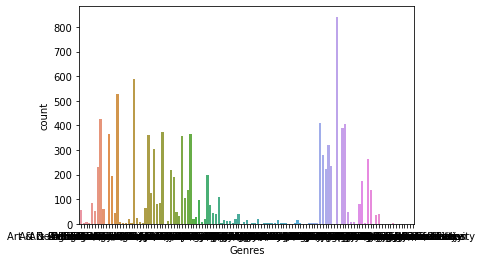

In [ ]:
sns.countplot(data=df,x='Genres')

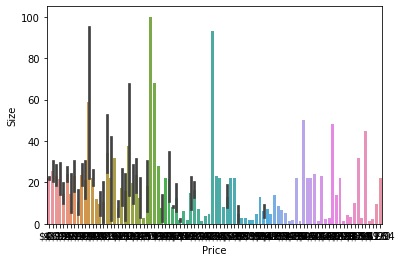

In [ ]:
sns.barplot(y='Size',x='Price',data=df)

In [ ]:
df['Price'].unique()

array([  0.  ,   4.99,   3.99,   6.99,   1.49,   2.99,   7.99,   5.99,
         3.49,   1.99,   9.99,   7.49,   0.99,   9.  ,   5.49,  10.  ,
        24.99,  11.99,  79.99,  16.99,  14.99,   1.  ,  29.99,  12.99,
         2.49,  10.99,   1.5 ,  19.99,  15.99,  33.99,  74.99,  39.99,
         3.95,   4.49,   1.7 ,   8.99,   2.  ,   3.88,  25.99, 399.99,
        17.99, 400.  ,   3.02,   1.76,   4.84,   4.77,   1.61,   2.5 ,
         1.59,   6.49,   1.29,   5.  ,  13.99, 299.99, 379.99,  37.99,
        18.99, 389.99,  19.9 ,   8.49,   1.75,  14.  ,   4.85,  46.99,
       109.99, 154.99,   3.08,   2.59,   4.8 ,   1.96,  19.4 ,   3.9 ,
         4.59,  15.46,   3.04,   4.29,   2.6 ,   3.28,   4.6 ,  28.99,
         2.95,   2.9 ,   1.97, 200.  ,  89.99,   2.56,  30.99,   3.61,
       394.99,   1.26,   1.2 ,   1.04])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10357 entries, 0 to 10840
Data columns (total 14 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   App               10357 non-null  object        
 1   Category          10357 non-null  object        
 2   Rating            10357 non-null  float64       
 3   Reviews           10357 non-null  float64       
 4   Size              10357 non-null  float64       
 5   Installs          10357 non-null  object        
 6   Type              10357 non-null  object        
 7   Price             10357 non-null  object        
 8   Content Rating    10357 non-null  object        
 9   Genres            10357 non-null  object        
 10  Last Updated      10357 non-null  datetime64[ns]
 11  Current Ver       10357 non-null  object        
 12  Android Ver       10357 non-null  object        
 13  lastupdatenumber  10357 non-null  float64       
dtypes: datetime64[ns](1), 

In [ ]:
clean=pd.get_dummies(df,columns=['App','Category','Installs','Type','Content Rating','Genres','Current Ver','Android Ver'],drop_first=True)

In [ ]:
x=clean.drop(['Price','lastupdatenumber','Last Updated'],axis=1)

y=clean['Price']

In [ ]:
from sklearn.model_selection import train_test_split


In [ ]:
(x_train,x_test,y_train,y_test)=train_test_split(x,y,test_size=0.2)

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVR
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


models = {
    'LR': LinearRegression(),
    'SVM': SVR(),
    'KNN': KNeighborsRegressor(),
    'DT': DecisionTreeRegressor(),
    'RF': RandomForestRegressor(),
    'XGB': XGBRegressor()
}


for name, model in models.items():
    print(f"Model: {name}")
    print("-"*20)
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    print(f"Train MAE: {mean_absolute_error(y_train, y_pred_train)}")
    print(f"Test MAE: {mean_absolute_error(y_test, y_pred_test)}")
    print(f"Train RMSE: {np.sqrt(mean_squared_error(y_train, y_pred_train))}")
    print(f"Test RMSE: {np.sqrt(mean_squared_error(y_test, y_pred_test))}")
    print(f"Train R2: {r2_score(y_train, y_pred_train)}")
    print(f"Test R2: {r2_score(y_test, y_pred_test)}")
    print("\n")

Model: LR
--------------------
Train MAE: 3.239718992694674e-07
Test MAE: 3.6534923709785483
Train RMSE: 6.143853407123519e-07
Test RMSE: 19.159061422080224
Train R2: 0.9999999999999983
Test R2: 0.0895928148731382


Model: SVM
--------------------
Train MAE: 1.018582595304867
Test MAE: 1.5063744317616727
Train RMSE: 15.200163270298594
Test RMSE: 20.123115920922952
Train R2: -0.003010394735406985
Test R2: -0.004332866602329455


Model: KNN
--------------------
Train MAE: 1.3462807483403743
Test MAE: 1.9544816602316604
Train RMSE: 13.525299565196484
Test RMSE: 20.68799324300885
Train R2: 0.20584968256330172
Test R2: -0.06150965466282443


Model: DT
--------------------
Train MAE: 4.381930344627956e-18
Test MAE: 1.3165588803088801
Train RMSE: 5.518523480666967e-17
Test RMSE: 19.94903156003814
Train R2: 1.0
Test R2: 0.012968865835951915


Model: RF
--------------------
Train MAE: 0.29924976463488173
Test MAE: 1.283135810810811
Train RMSE: 5.7470178533895195
Test RMSE: 19.89054923769604
Tra

ValueError: ignored